# Preparing the environment

In [ ]:
!pip install -U albumentations
!pip install opencv-python-headless==4.1.2.30

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 123 kB 31.8 MB/s 
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.2.1
    Uninstalling albumentations-1.2.1:
      Successfully uninstalled albumentations-1.2.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.8 MB 1.4 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.6.0.66
    Uninstalling opencv-python-headless-4.6.0.66:
      Successfully uninstalled opencv-python-headless-4.6.0.66


Retrieve Data

In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
!rm -r images

rm: cannot remove 'images': No such file or directory


In [ ]:
!unzip -n /content/drive/MyDrive/images.zip > /dev/null

In [ ]:
!ls images

bad  good


# Retrieving Data

In [ ]:
from dataclasses import dataclass
import numpy as np
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import os
from random import shuffle

In [ ]:
num_classes = 2

class ApartmentsDataset:
  def __init__(self, root: Path, transform=None):
    self._root = root
    self.bad_condition_images = list(self._root.glob("bad/*.png"))
    self.good_condition_images = list(self._root.glob("good/*.png"))

    self._image_list = self.bad_condition_images + self.good_condition_images
    shuffle(self._image_list)
    self._transform = transform

  def __len__(self) -> int:
    return len(self._image_list)

  def getitem(self, index: int) -> dict:
    img_path = self._image_list[index]
    standard_num = 1 if 'good' in str(img_path) else 0
    standard_vec = np.zeros((num_classes))
    standard_vec[standard_num] = 1
    image = cv2.imread(str(img_path))
    return {"image": image, "standard": standard_vec}

  def drop_image(self, index: int):
    img_path = self._image_list[index]
    print(img_path)
    if os.path.exists(img_path):
      os.remove(img_path)

  def __getitem__(self, index: int) -> dict:
    item = self.getitem(index)
    if self._transform is None:
      return item
    else:
      return self._transform(**item)

  def get_good_apartment(self):
    return self.good_condition_images

  def get_bad_apartment(self):
    return self.bad_condition_images


In [ ]:
# delete all paths with invlaid (None) images
dataset = ApartmentsDataset(Path("images"))
for index in range(len(dataset)):
  if dataset[index]['image'] is None:
    dataset.drop_image(index)

images/good/otodom-62964200-1.png


In [ ]:
dataset = ApartmentsDataset(Path("images"))

# Analysing Data

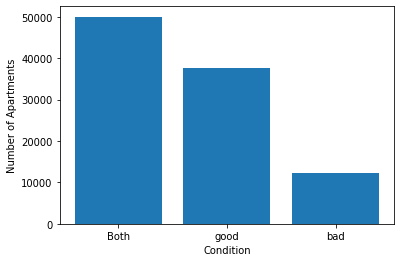

In [ ]:
num_all_apartments = len(dataset) 
num_good_apartments = len(dataset.get_good_apartment())
num_bad_apartments = len(dataset.get_bad_apartment())
x = ('Both', 'good', 'bad')
y = (num_all_apartments, num_good_apartments, num_bad_apartments)
plt.xlabel('Condition')
plt.ylabel('Number of Apartments')
plt.bar(x,y)
plt.show()

In [ ]:
dataset[0]['standard']

array([0., 1.])

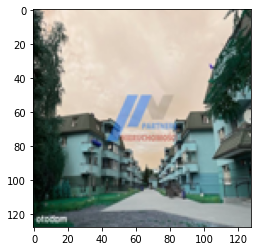

In [ ]:
plt.imshow(dataset[0]['image'])

In [ ]:
pic = dataset[0]['image']
print('Shape of the image : {}'.format(pic.shape))
print('Image Height {}'.format(pic.shape[0]))
print('Image Width {}'.format(pic.shape[1]))
print('Dimension of Image {}'.format(pic.ndim))
print('Maximum RGB value in this image {}'.format(pic.max()))
print('Minimum RGB value in this image {}'.format(pic.min()))

Shape of the image : (128, 128, 3)
Image Height 128
Image Width 128
Dimension of Image 3
Maximum RGB value in this image 251
Minimum RGB value in this image 0


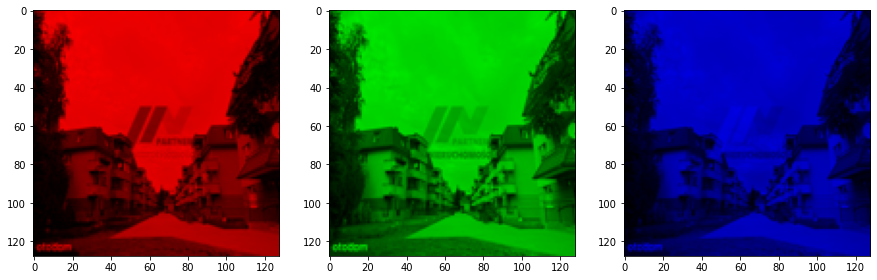

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(15,5))
for c, ax in zip(range(3), ax):
     # create zero matrix
     split_img = np.zeros(pic.shape, dtype="uint8")
     # 'dtype' by default: 'numpy.float64'  # assing each channel
     split_img[ :, :, c] = pic[ :, :, c] # display each channel
     ax.imshow(split_img)

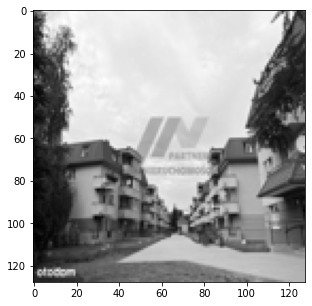

In [ ]:
gray = lambda rgb : np.dot(rgb[... , :3] , [0.299 , 0.587, 0.114])
gray = gray(pic)
plt.figure( figsize = (5,5))
plt.imshow(gray, cmap = plt.get_cmap(name = 'gray'))
plt.show()